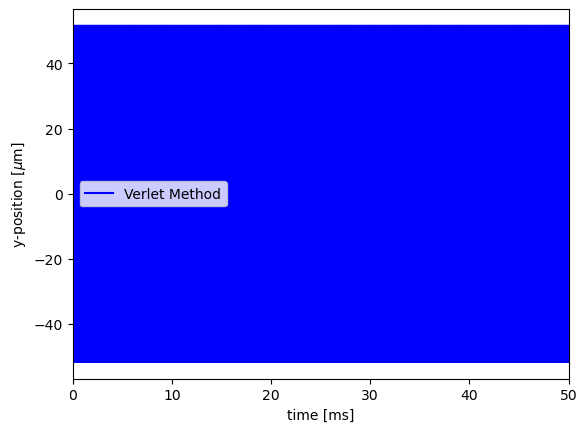

In [3]:
from sympy import *
from numpy import *
import matplotlib.pyplot as plt

# 定数の設定
m = 40.0 * 1.66e-27  # カルシウムの質量
kb = 1.380e-23  # ボルツマン定数
Tk = 500e-6  # 温度
T = 500  # 初期温度
d = 8  # 回転角度（度）
rad = (d / 180) * pi  # ラジアン
wy = 2 * pi * 1000e3  # y方向の角周波数

# レーザー冷却項に必要な定数
hbar = 1.054e-34  # J.s
c = 3.0e8  # 光速
Gamma = 2 * pi * 20.6e6  # Hz
tau = 1 / Gamma  # 寿命
lambda_ = 397e-9  # 冷却レーザーの波長
h = 2*pi*hbar
delta = 2 * pi * 10e6  # デチューン（Hz）
k = 2 * pi / lambda_
dg = -0.5  # δ/Γ
I = 120e-6 / (pi * (60e-6)**2)  # 強度
Isat = (pi / 3) * (h * c) / (tau * lambda_**3)  # W/m^2
s = I / Isat

# 初期条件
y0 = -50e-6
vy0 = 100
dt = 1e-8

# 時間データ
t = arange(0, 5e-2, dt)

# 運動方程式
def acceleration(vy, y):
    K = -hbar * k * Gamma * s / 2
    return -wy**2 * y + K / m / (1 + s + ((delta - k * vy) / (2 * Gamma))**2)

# Verlet法によるシミュレーション
def verlet_method(t, dt, y0, vy0, omega):
    y = zeros(len(t))
    vy = zeros(len(t))
    y[0] = y0
    vy[0] = vy0

    # 初期位置の計算
    y[1] = y[0] + vy[0] * dt - 0.5 * acceleration(vy[0], y[0]) * dt**2

    for i in range(1, len(t) - 1):
        y[i + 1] = 2 * y[i] - y[i - 1] + acceleration(vy[i], y[i]) * dt**2

    for i in range(len(t) - 1):
        vy[i + 1] = (y[i + 1] - y[i - 1]) / (2 * dt)

    return y, vy

# Verlet法によるシミュレーション
y_verlet, vy_verlet = verlet_method(t, dt, y0, vy0, wy)

# 結果のプロット
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(t * 10**3, y_verlet * 10**6, 'b', label='Verlet Method')
ax.set_xlabel('time [ms]')
ax.set_ylabel('y-position [$\mu$m]')
ax.set_xlim(0, 50)
plt.legend(loc='best')
plt.show()
